# **Entrega 3 - Aprendizaje de máquinas**


In [2]:
#@markdown ------
#@markdown #### **Importaciones para el desarrollo**
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
#@markdown ------

## **Ejercicio 1 - ```DBSCAN``` (C = 1.0)**

Implemente el algoritmo de ```DBSCAN``` para agrupar el subconjunto de datos ```train_data```. Para determinar el número correcto de clusters, use el análisis por el método del codo y de la silueta, de tal manera que encuentre la mejor combinación de parámetros para ```DBSCAN``` que le permita obtener el mejor desempeño. Al final, justifique a través de un párrafo corto su elección de parámetros.

**NOTA:** Los datos se generarán de acuerdo a su número se CC. Por favor, ingrese su número en la línea indicada.

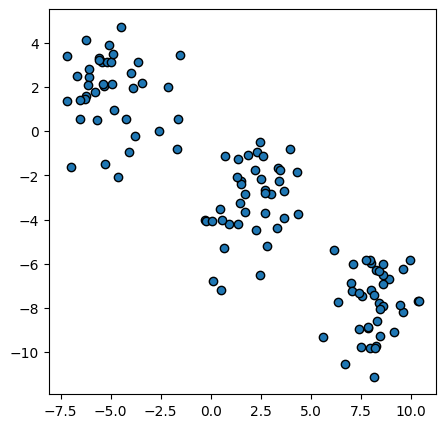

In [1]:
#@markdown ------
#@markdown #### **⚠️ Ingrese su número de CC**. ⬇

!gdown -qq "https://drive.google.com/uc?id=1_aBCW63crUL_mPwE8ATzCtsjNa5rRiUL" -O /eval_tools-1.1-py3-none-any.whl
!pip3 -qq install /eval_tools-1.1-py3-none-any.whl
!rm -r /eval_tools-1.1-py3-none-any.whl

import matplotlib.pyplot as plt
from eval_tools import import_data_from_CC

CC = 1001812708 #@param {type:"number"}

_, train_data, _, _ = import_data_from_CC (CC)

_, axes = plt.subplots(figsize=(5,5))
axes.scatter(train_data[:, 0], train_data[:, 1], edgecolors='k')

#@markdown ------

Verifique las variables ```train_data```

In [3]:
print (train_data.shape)

(120, 2)


X_train: (96, 2), X_test: (24, 2)


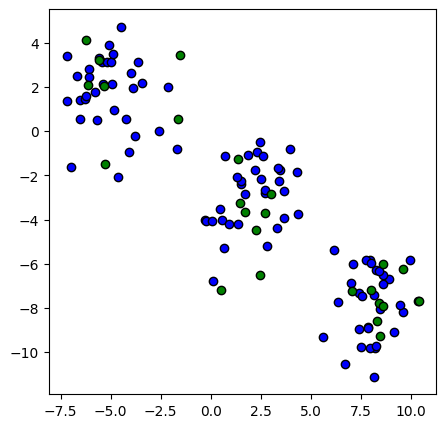

In [4]:
# Train test split
X_train, X_test = train_test_split(train_data, test_size=0.2, random_state=1)
print(f'X_train: {X_train.shape}, X_test: {X_test.shape}')

_, ax = plt.subplots(figsize = (5,5))
ax.scatter(X_train[:, 0], X_train[:, 1], c='b', edgecolors='k')
ax.scatter(X_test[:, 0], X_test[:, 1], c='g', edgecolors='k')
plt.show()

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

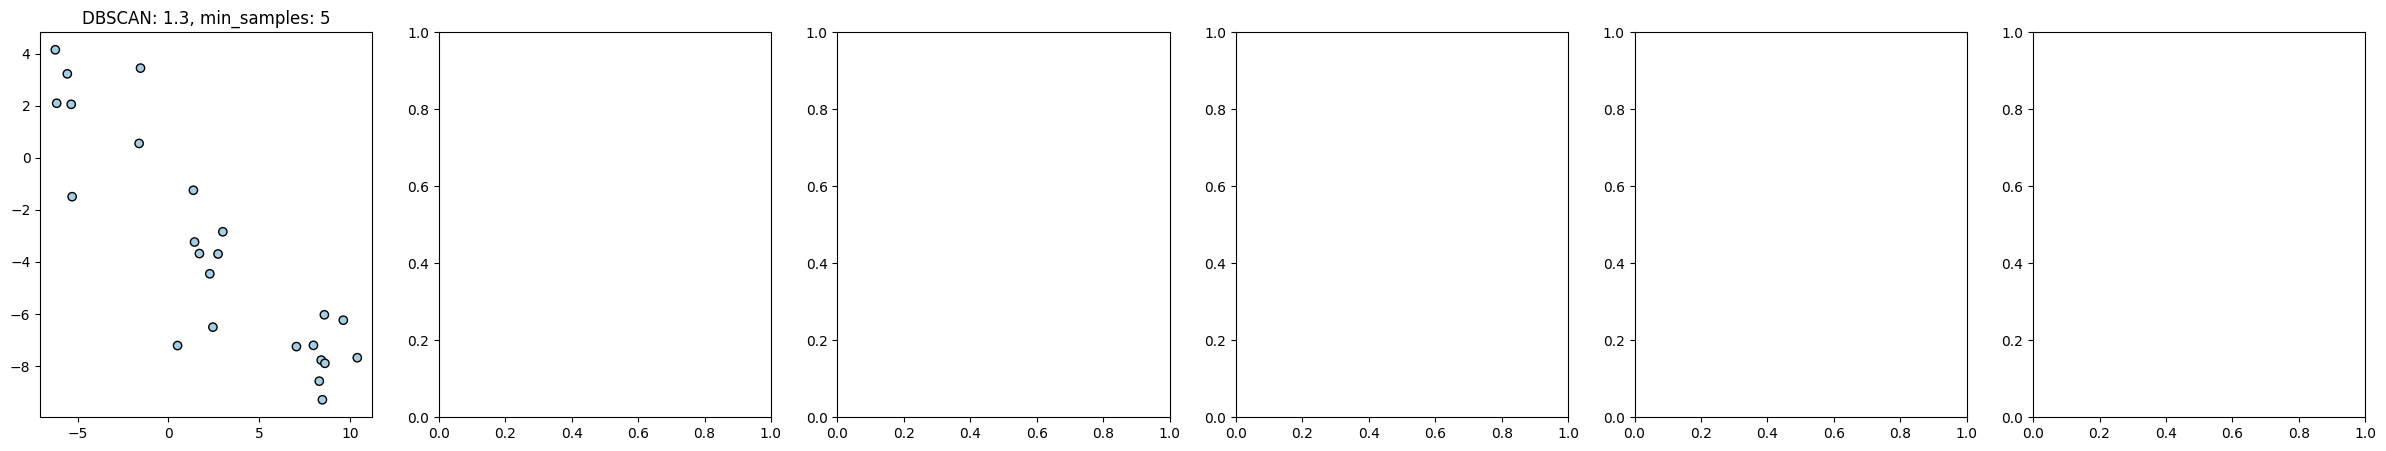

In [8]:
clusters = [5, 5, 7, 7, 10]
option_eps = [1.3, 1.6, 1.9, 2.2, 2.5]
silhouette_distances = []

_, axes = plt.subplots(1, 6, figsize=(30,5))

for cluster, eps, ax in zip(clusters, option_eps, axes):
  dbscan = DBSCAN(eps = eps , min_samples = cluster )
  predictions = dbscan.fit_predict(X_test)

  ax.scatter(X_test[:, 0], X_test[:, 1], c=predictions, edgecolors='k', cmap='Paired')
  ax.set_title(f'DBSCAN: {eps}, min_samples: {cluster}')

  distance = silhouette_score(X_test, predictions, metric="euclidean")
  silhouette_distances.append(distance)

# axes[5].plot( clusters , silhouette_distances , marker="x", linewidth=2)
# axes[5].set_title('Silhouette')

## **Ejercicio 2 - ```MeanShift``` vs ```DBSCAN``` (C = 2.0)**

Compare el desempeño con ```MeanShift``` y ```DBSCAN```. Para esto, configure ambos algoritmos con la mejor selección de parámetros posible para obtener los mejores desempeños. Calcule métricas mencionadas debajo sobre el subconjunto, y determine el mejor modelo. Justifique su elección a través de estas métricas.

Métricas:
- Adjusted Rand Index
- Adjusted Mutual Information score
- Silhouette

**NOTA:** Los datos se generarán de acuerdo a su número se CC. Por favor, ingrese su número en la línea indicada.


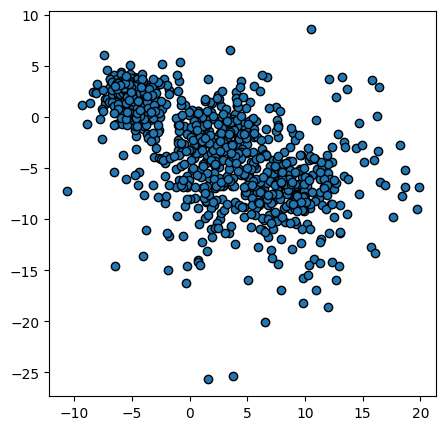

In [ ]:
#@markdown ------
#@markdown #### **⚠️ Ingrese su número de CC**. ⬇

!gdown -qq "https://drive.google.com/uc?id=1_aBCW63crUL_mPwE8ATzCtsjNa5rRiUL" -O /eval_tools-1.1-py3-none-any.whl
!pip3 -qq install /eval_tools-1.1-py3-none-any.whl
!rm -r /eval_tools-1.1-py3-none-any.whl

import matplotlib.pyplot as plt
from eval_tools import import_data_from_CC

CC = 1001812708 #@param {type:"number"}
train_data, _, train_targets, _ = import_data_from_CC (CC, algorithm='unequal_var')

_, axes = plt.subplots(figsize=(5,5))
axes.scatter(train_data[:, 0], train_data[:, 1], edgecolors='k')

#@markdown ------

Verifique las variables ```train_data```, ```test_data```

In [ ]:
print (train_data.shape, train_targets.shape)

(1000, 2) (1000,)


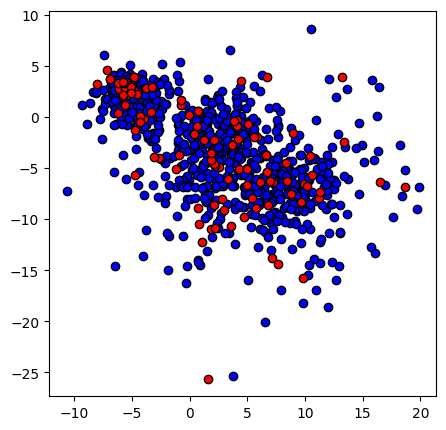

In [ ]:
X_train, X_test = train_test_split(train_data, test_size=0.1)

_, ax = plt.subplots(figsize=(5,5))
ax.scatter(X_train[:, 0], X_train[:, 1], c='b', edgecolors='k')
ax.scatter(X_test[:, 0], X_test[:, 1], c='r', edgecolors='k')

In [ ]:
# MeanShift
ms = MeanShift(bandwidth=32*0.2)
ms.fit(X_train)

# DBSCAN
dbscan = DBSCAN(eps = 32*0.1, min_samples= 5)

In [ ]:
cluster_centers = ms.cluster_centers_
print(f'Numero de clusters MeanShift: {len(cluster_centers)}')

Numero de clusters MeanShift: 3


Text(0.5, 1.0, 'DBSCAN')

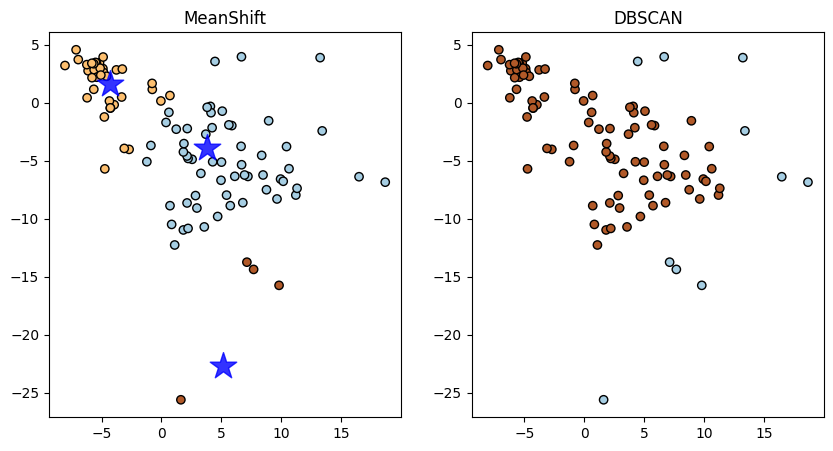

In [ ]:
predictions_ms = ms.predict(X_test)
predictions_dbscan = dbscan.fit_predict(X_test)

_, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].scatter(X_test[:, 0], X_test[:, 1], c=predictions_ms, edgecolors='k', cmap='Paired')
axes[0].scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='b', s=400, marker='*', alpha=0.8)
axes[0].set_title('MeanShift')

axes[1].scatter(X_test[:, 0], X_test[:, 1], c=predictions_dbscan, edgecolors='k', cmap='Paired')
axes[1].set_title('DBSCAN')

In [ ]:
# Ingrese el código aquí.


# Utilice cuantas celdas de código necesite


# --
# Muestre los resultados


########----- Results for DBSCAN 0 -----########
	-- ARI --	 -- AMI --	 
	  0.328  	   0.571  	 
########----- Results for DBSCAN 1 -----########
	-- ARI --	 -- AMI --	 
	  0.670  	   0.782  	 
########----- Results for MeanShift 0 -----########
	-- ARI --	 -- AMI --	 
	  0.736  	   0.793  	 
########----- Results for MeanShift 1 -----########
	-- ARI --	 -- AMI --	 
	  0.642  	   0.743  	 


## **Ejercicio 3 - ```MeanShift``` vs ```DBSCAN``` - imágenes (C = 2.0)**


Use las siguientes imágenes para realizar segmentación semántica usando ```MeanShift``` y ```DBSCAN```. \\

**NOTA:** Ejecutar la segmentación no deberá durar más que unos segundos. En caso de demorar demasiado, se le penalizará en la nota.

In [ ]:
#@markdown ------
#@markdown #### **⚠️❗ Ejecute esta celda para descargar los archivos necesario**
#@markdown  \\
#@markdown Esta celda creará la carpeta ```images_E3```, en donde encontrará las imágenes con las que deberá trabajar

# for c in concepts_list:
!gdown -qq "https://drive.google.com/uc?id=17csEqkQPPaepgNe9mqKccZaNEah8powd" -O /sample_images.zip
!unzip -qq /sample_images.zip -d /content/images_E3/
!rm -r /sample_images.zip /content/images_E3/__MACOSX
#@markdown ------

Verifique que en el directorio ```images_E3``` se encuentran las imágenes

In [ ]:
!ls images_E3/

In [ ]:
# Ingrese el código aquí.


# Utilice cuantas celdas de código necesite


# --
# Muestre los resultados
